In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Fashion MNIST dataset

The Fashion MNIST dataset is used to solve a classification problem. Given images of clothing and accessories, the goal is to classify them into one of 10 categories. It's like teaching a computer to recognize different types of clothing, such as shirts, pants, dresses, and shoes, from images.

In [5]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# SGD

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.6765 - loss: 1.0264 - val_accuracy: 0.7969 - val_loss: 0.5734
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.8174 - loss: 0.5323 - val_accuracy: 0.8232 - val_loss: 0.5127
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - accuracy: 0.8369 - loss: 0.4767 - val_accuracy: 0.8199 - val_loss: 0.5011
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.8450 - loss: 0.4518 - val_accuracy: 0.8357 - val_loss: 0.4659
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8490 - loss: 0.4420 - val_accuracy: 0.8324 - val_loss: 0.4672
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8542 - loss: 0.4189 - val_accuracy: 0.8467 - val_loss: 0.4384
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8626 - loss: 0.3998 - val_accuracy: 0.8447 - val_loss: 0.4350
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.8659 - loss:

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [8]:
pred = model.predict(x_test)
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test

accuracy_score(true_labels, predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


0.8818

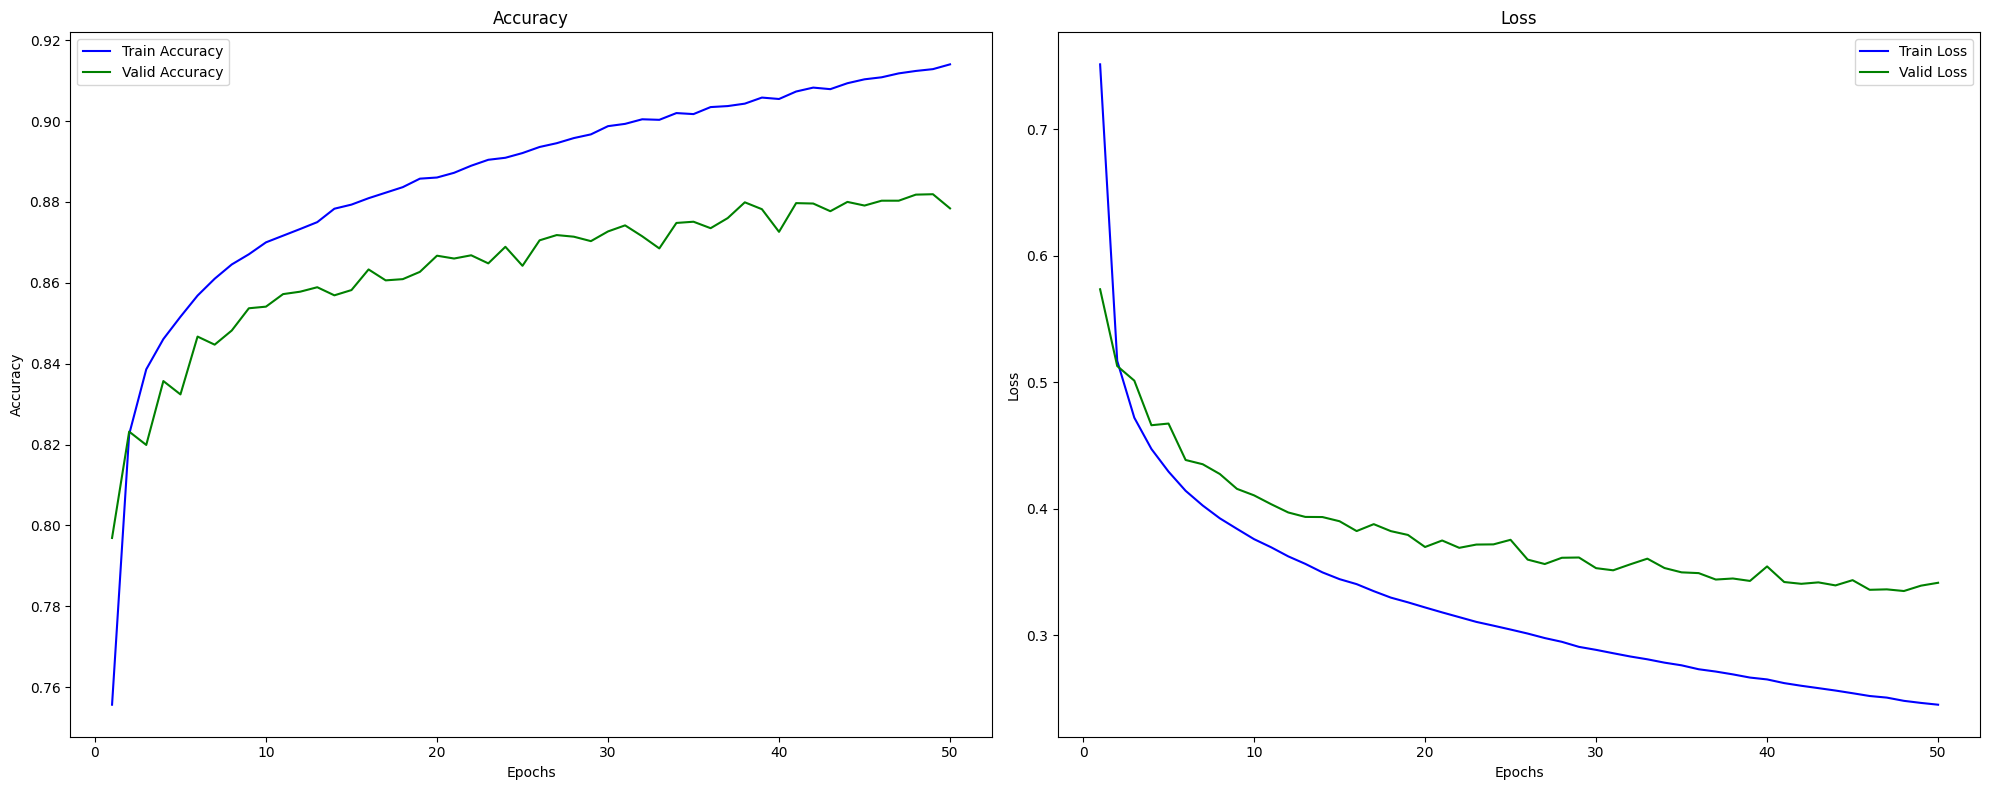

In [9]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# MB-GD

In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/50


C:\Users\ToanGTV\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.6800 - loss: 1.0155 - val_accuracy: 0.8050 - val_loss: 0.5729
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8189 - loss: 0.5344 - val_accuracy: 0.8254 - val_loss: 0.5068
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.8351 - loss: 0.4826 - val_accuracy: 0.8363 - val_loss: 0.4761
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.8461 - loss: 0.4462 - val_accuracy: 0.8393 - val_loss: 0.4661
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.8519 - loss: 0.4316 - val_accuracy: 0.8415 - val_loss: 0.4535
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.8570 - loss: 0.4176 - val_accuracy: 0.8345 - val_loss: 0.4572
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.8617 - loss: 0.3967 - val_accuracy: 0.8433 - val_loss: 0.4379
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8614 - loss: 0.3927

In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
pred = model.predict(x_test)
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test

accuracy_score(true_labels, predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


0.8831

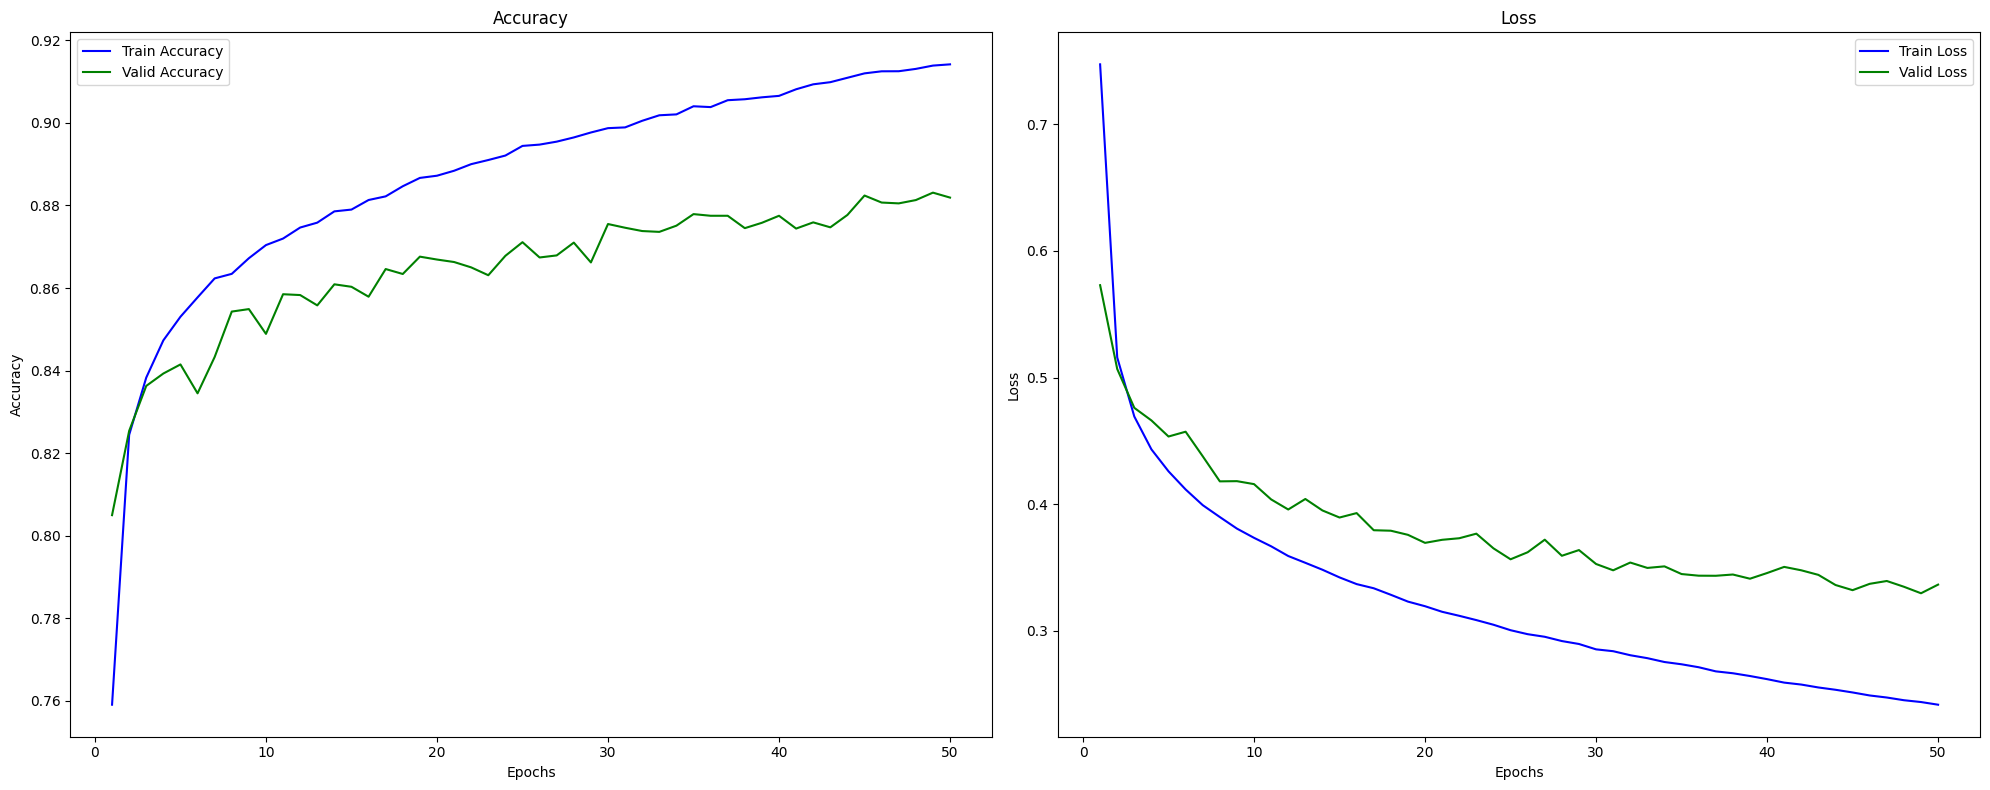

In [13]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Momentum

In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=SGD(momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=20, restore_best_weights=True)])

C:\Users\ToanGTV\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7666 - loss: 0.6656 - val_accuracy: 0.8251 - val_loss: 0.4920
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8550 - loss: 0.4011 - val_accuracy: 0.8555 - val_loss: 0.4043
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8678 - loss: 0.3629 - val_accuracy: 0.8227 - val_loss: 0.4915
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8786 - loss: 0.3325 - val_accuracy: 0.8589 - val_loss: 0.3902
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8841 - loss: 0.3162 - val_accuracy: 0.8700 - val_loss: 0.3627
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8866 - loss: 0.3093 - val_accuracy: 0.8693 - val_loss: 0.3566
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8927 - loss: 0.2916 - val_accuracy: 0.8663 - val_loss: 0.3718
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8924 - loss: 0.2863 - 

In [15]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,542 (795.09 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,772 (397.55 KB)

In [16]:
pred = model.predict(x_test)
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test

accuracy_score(true_labels, predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step


0.8845

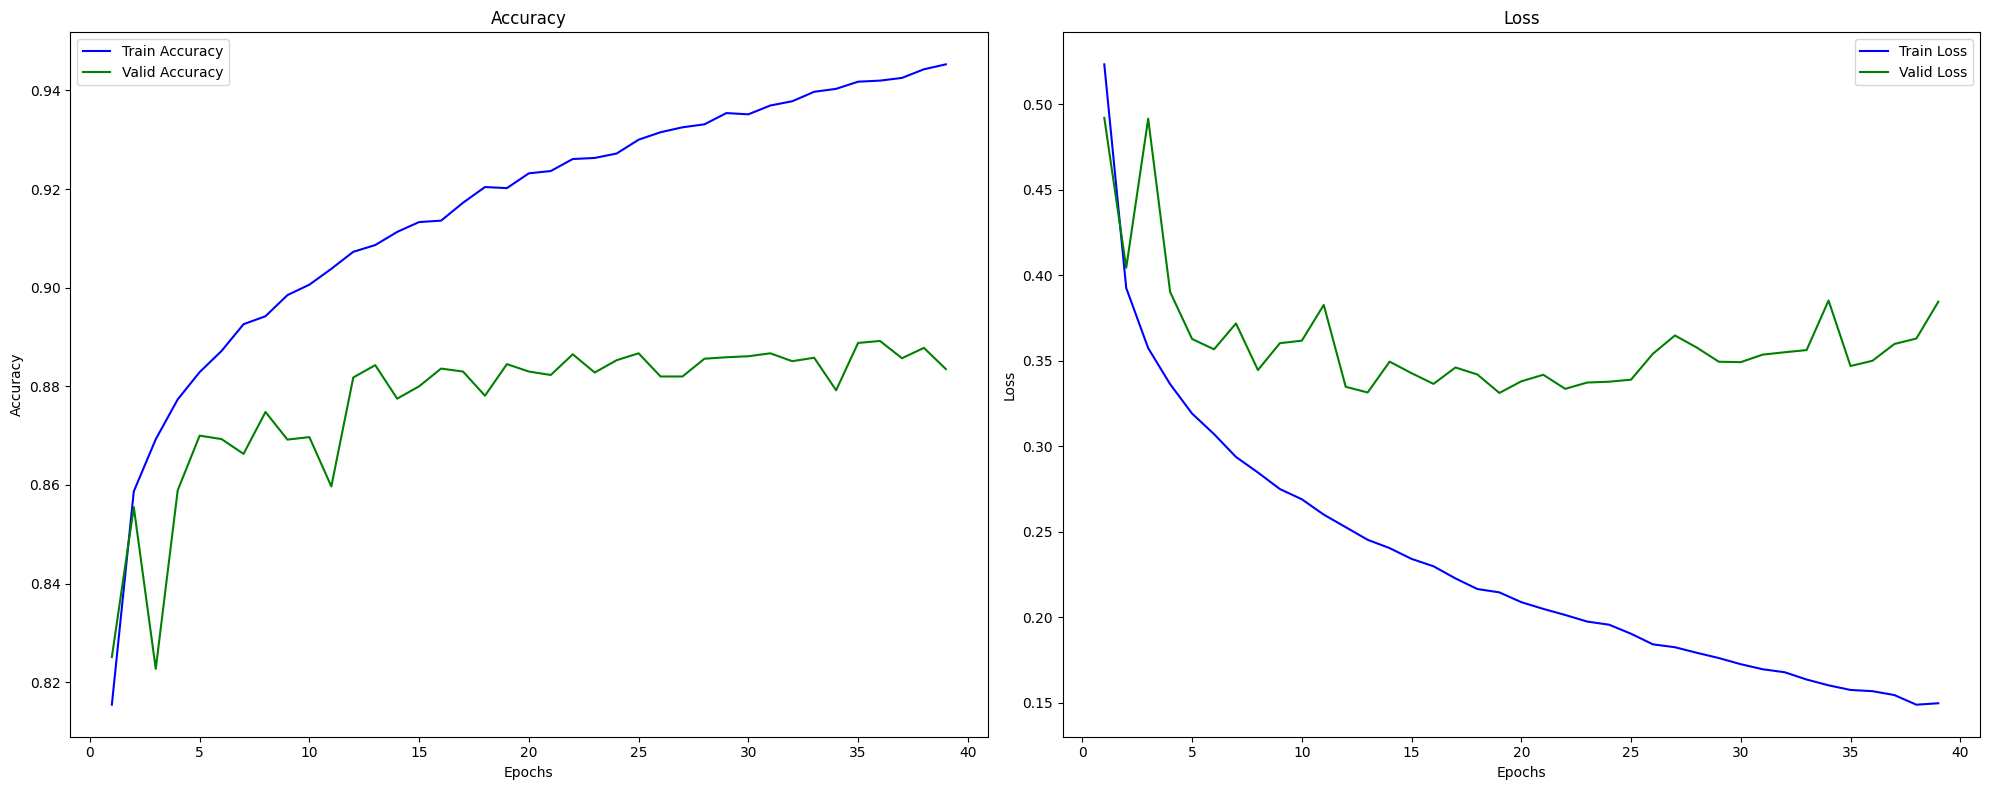

In [17]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Adagrad

In [18]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adagrad(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/50


C:\Users\ToanGTV\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6023 - loss: 1.3944 - val_accuracy: 0.7346 - val_loss: 0.8053
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7581 - loss: 0.7493 - val_accuracy: 0.7735 - val_loss: 0.6909
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7923 - loss: 0.6556 - val_accuracy: 0.7887 - val_loss: 0.6399
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8042 - loss: 0.6125 - val_accuracy: 0.7998 - val_loss: 0.6090
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8117 - loss: 0.5837 - val_accuracy: 0.8068 - val_loss: 0.5888
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8172 - loss: 0.5653 - val_accuracy: 0.8090 - val_loss: 0.5727
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8229 - loss: 0.5419 - val_accuracy: 0.8133 - val_loss: 0.5613
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8281 - loss: 0.5289 - val_accurac

In [19]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,542 (795.09 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,772 (397.55 KB)

In [20]:
pred = model.predict(x_test)
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test

accuracy_score(true_labels, predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


0.84

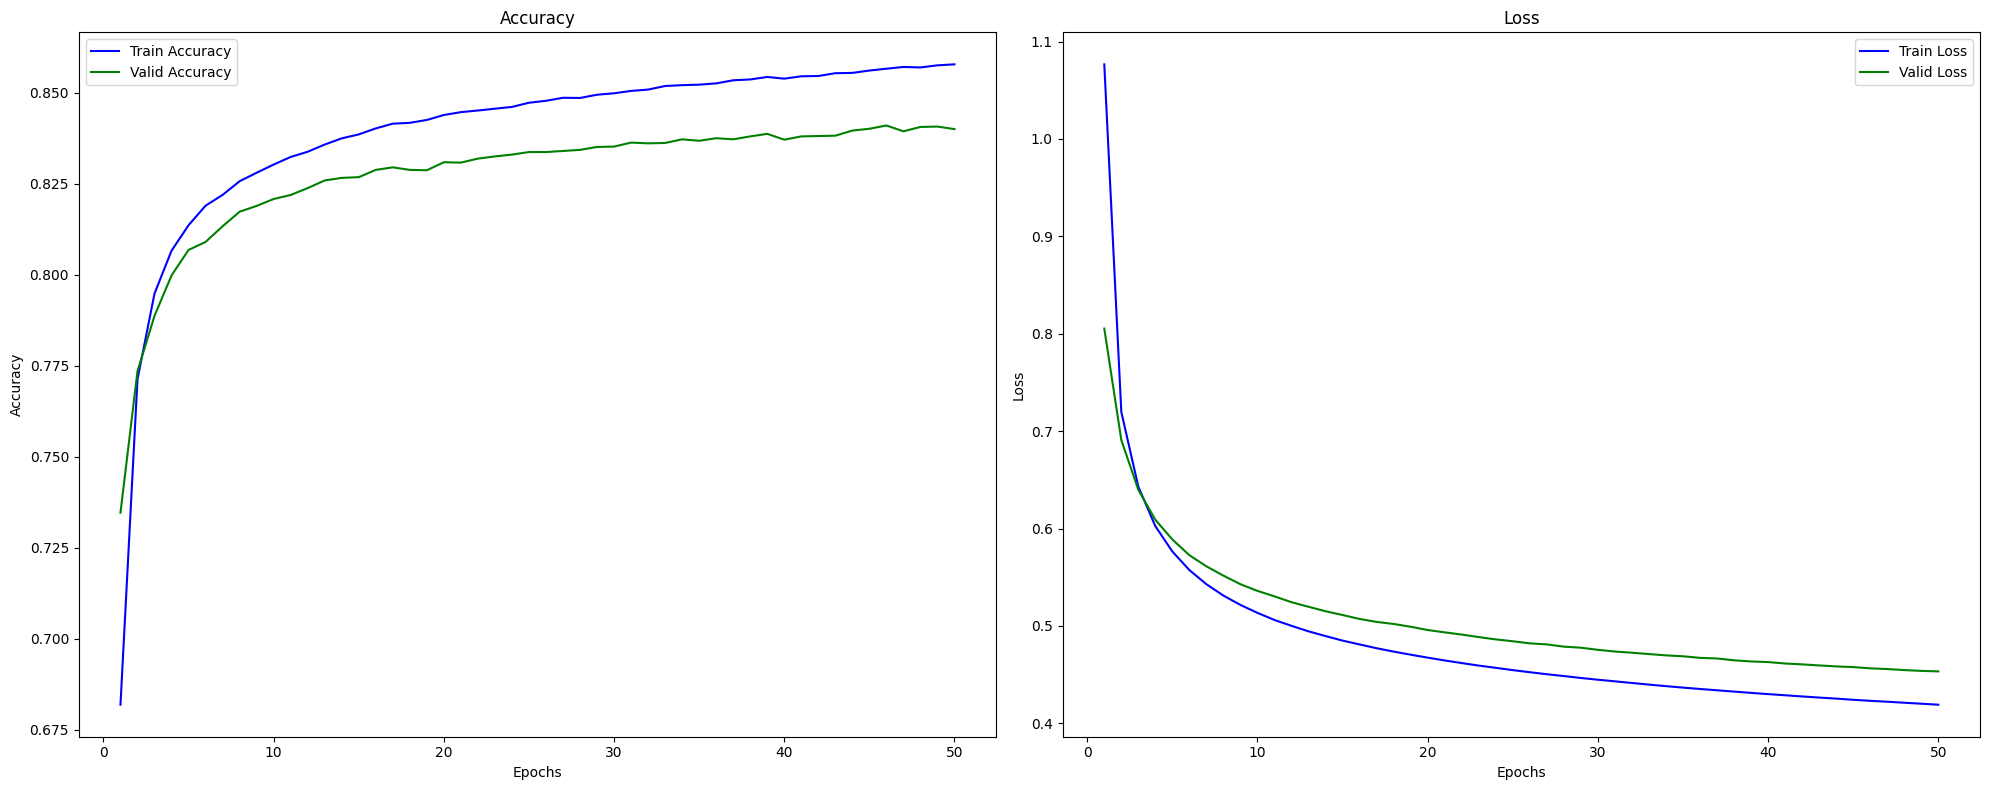

In [21]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# RMSprod

In [22]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/50


C:\Users\ToanGTV\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7716 - loss: 0.6448 - val_accuracy: 0.8444 - val_loss: 0.4307
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8615 - loss: 0.3841 - val_accuracy: 0.8522 - val_loss: 0.4134
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8779 - loss: 0.3430 - val_accuracy: 0.8674 - val_loss: 0.3741
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8843 - loss: 0.3273 - val_accuracy: 0.8679 - val_loss: 0.3800
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8887 - loss: 0.3154 - val_accuracy: 0.8699 - val_loss: 0.3836
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8921 - loss: 0.2973 - val_accuracy: 0.8714 - val_loss: 0.3832
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8962 - loss: 0.2926 - val_accuracy: 0.8737 - val_loss: 0.3912
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9017 - loss: 0.2802 - val_accurac

In [23]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,542 (795.09 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,772 (397.55 KB)

In [24]:
pred = model.predict(x_test)
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test

accuracy_score(true_labels, predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


0.8674

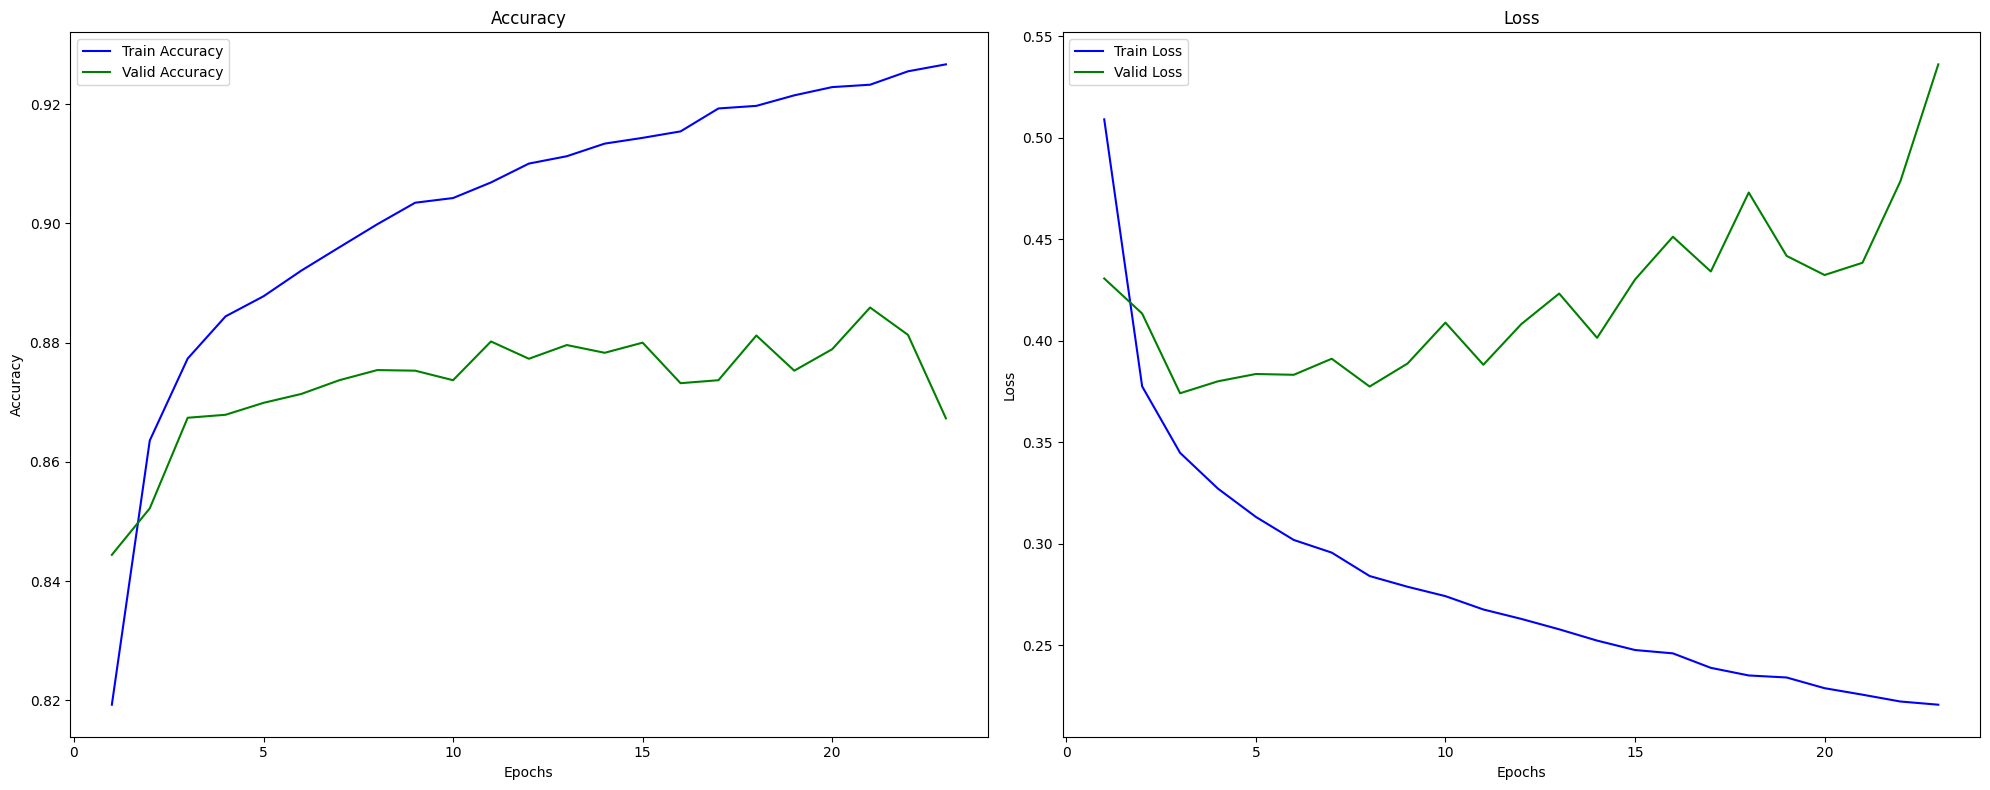

In [25]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Adam

In [26]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/50


C:\Users\ToanGTV\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7827 - loss: 0.6273 - val_accuracy: 0.8438 - val_loss: 0.4391
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8608 - loss: 0.3810 - val_accuracy: 0.8400 - val_loss: 0.4395
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8781 - loss: 0.3386 - val_accuracy: 0.8623 - val_loss: 0.3680
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8856 - loss: 0.3118 - val_accuracy: 0.8667 - val_loss: 0.3738
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8933 - loss: 0.2939 - val_accuracy: 0.8681 - val_loss: 0.3761
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8964 - loss: 0.2805 - val_accuracy: 0.8709 - val_loss: 0.3559
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9010 - loss: 0.2698 - val_accuracy: 0.8782 - val_loss: 0.3334
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9031 - loss: 0.2600 - val_accurac

In [27]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [28]:
pred = model.predict(x_test)
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test

accuracy_score(true_labels, predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


0.8782

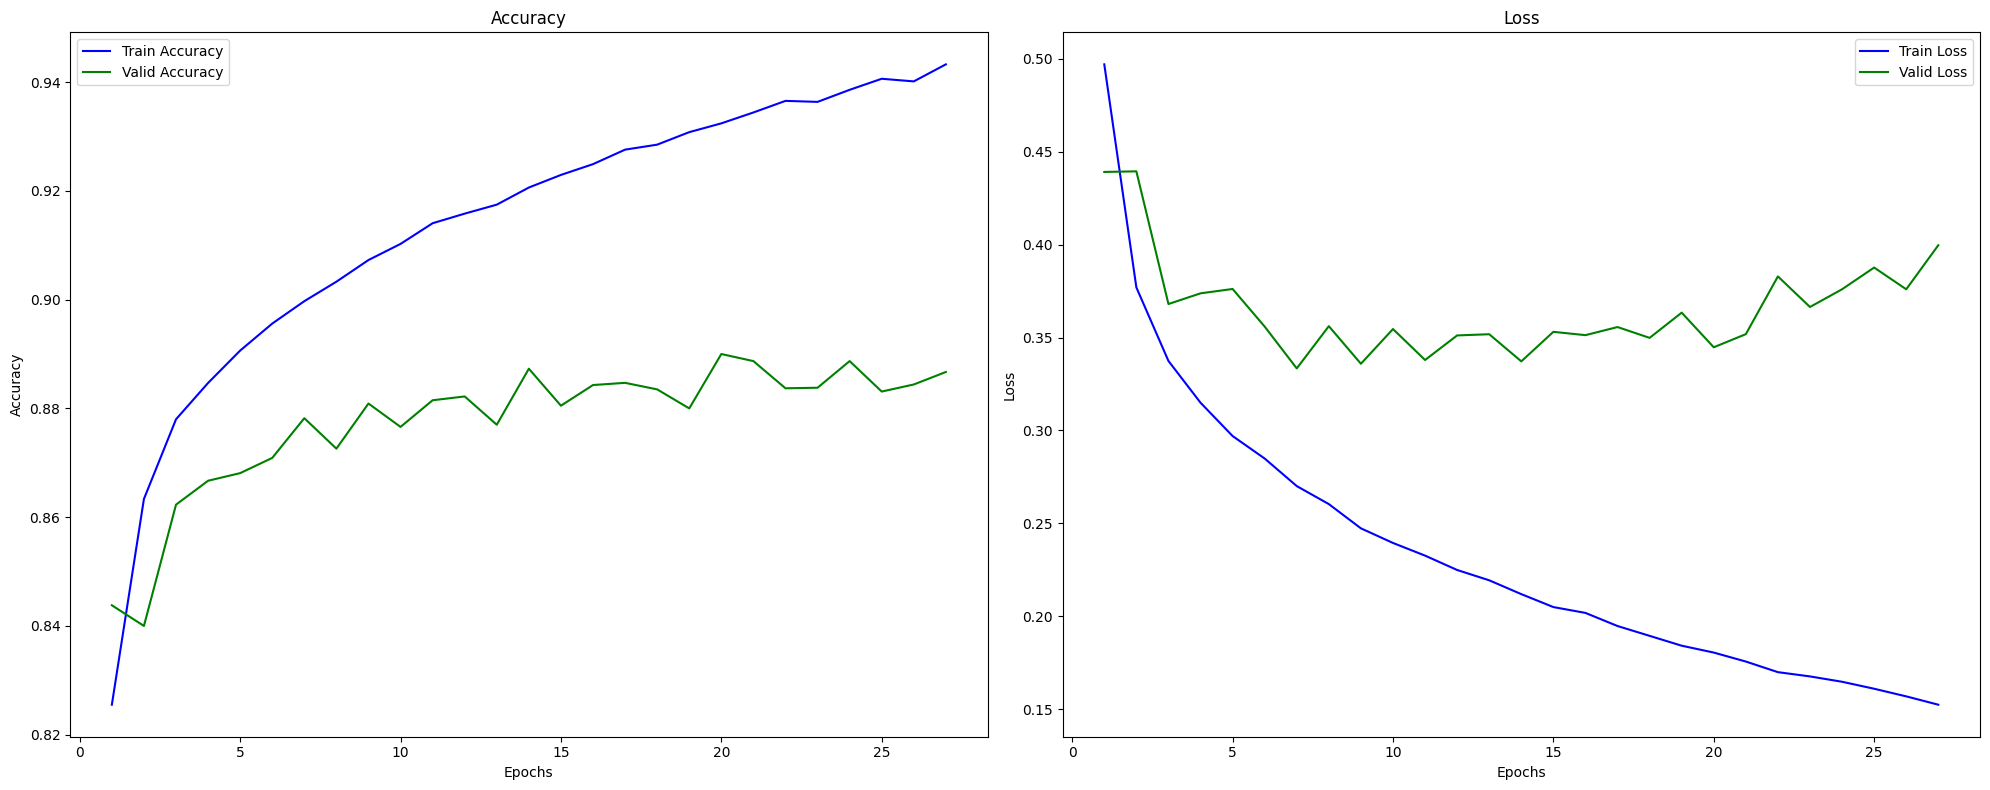

In [29]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()